In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm
from PIL import Image

In [2]:
img_list=[path for path in sorted(Path("../input/medical-dataset-1").glob("train*/**/images/*"))]

In [3]:
img_list+=[path for path in sorted(Path("../input/medical-dataset").glob("train*/**/images/*"))]

In [4]:
len(img_list)

320

In [5]:
mask_list=[path for path in sorted(Path("../input/medical-dataset-1").glob("train*/**/masks/*"))]

In [6]:
mask_list+=[path for path in sorted(Path("../input/medical-dataset").glob("train*/**/masks/*"))]

In [7]:
os.mkdir("2D_images")

In [8]:
def generate_bboxes(image_list, mask_list):
    data_dict={"file":[],"h":[],"w":[],"x1":[],"x2":[],"y1":[],"y2":[]}
    for image,mask in tqdm(zip(image_list,mask_list)):
        img=np.load(image)
        mask_=np.load(mask)
        z_dims=[]
        for i in range(0,mask_.shape[-1]):
            if(np.sum(mask_[:,:,i]) >0 ):
                z_dims.append(i)
        image_2d=np.sum(img[:,:,z_dims[0]:(z_dims[-1]+1)],axis=-1)
        mask_2d=np.sum(mask_[:,:,z_dims[0]:(z_dims[-1]+1)],axis=-1)
        img_save=np.zeros((img.shape[0],img.shape[1],3))
        img_save[:,:,0]=image_2d
        img_save[:,:,1]=image_2d
        img_save[:,:,2]=image_2d
        name=str(Path(image.name).with_suffix(".jpg"))
        num_seeds=mask_.max()
        for seed in range(1,num_seeds+1):
            mask__=(mask_==seed)
            mask__=np.sum(mask__,axis=-1)
            maskx = np.any(mask__, axis=0)
            masky = np.any(mask__, axis=1)
            x1 = np.argmax(maskx)
            y1 = np.argmax(masky)
            x2 = len(maskx) - np.argmax(maskx[::-1])
            y2 = len(masky) - np.argmax(masky[::-1])
            x1=x1
            x2=x2
            y1=y1
            y2=y2
            h=img.shape[0]
            w=img.shape[1]
            data_dict["file"].append(name)
            data_dict["h"].append(h)
            data_dict["w"].append(w)
            data_dict["x1"].append(x1)
            data_dict["x2"].append(x2)
            data_dict["y1"].append(y1)
            data_dict["y2"].append(y2) 
        plt.figure(figsize=(h/1000.0,w/1000.0), dpi=100)
        plt.axis('off')
        plt.gca().set_axis_off()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
        plt.margins(0,0)
        plt.imshow(img_save, cmap="gray")
        plt.imshow(mask_2d,cmap="jet", alpha=0.3)
        plt.savefig(os.path.join("2D_images",name), dpi=1000, bbox_inches='tight', pad_inches=0)
    return data_dict

0it [00:00, ?it/s]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


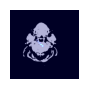

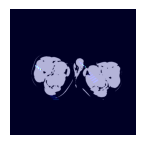

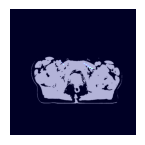

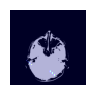

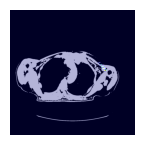

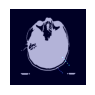

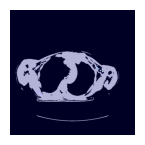

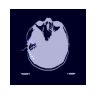

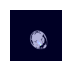

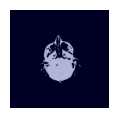

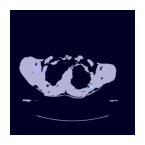

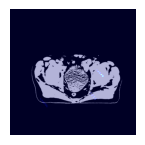

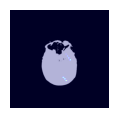

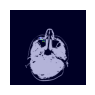

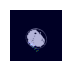

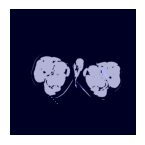

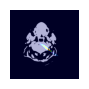

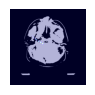

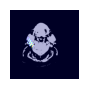

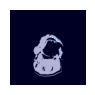

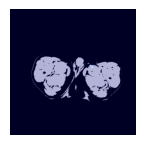

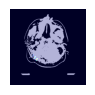

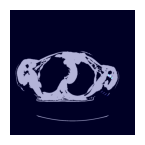

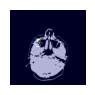

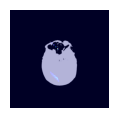

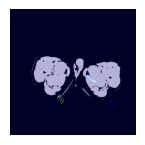

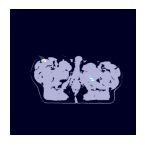

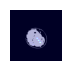

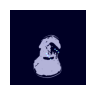

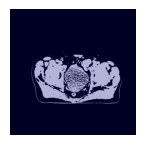

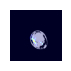

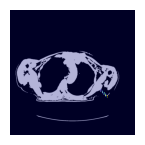

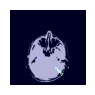

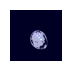

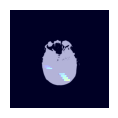

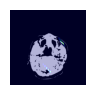

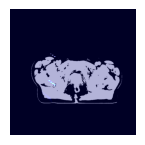

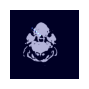

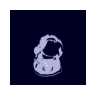

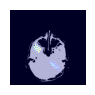

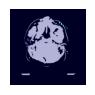

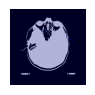

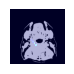

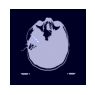

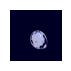

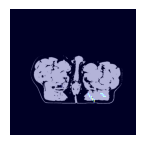

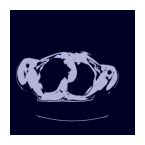

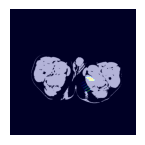

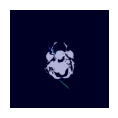

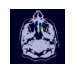

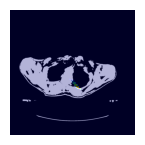

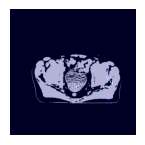

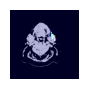

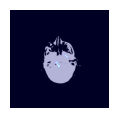

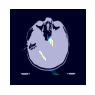

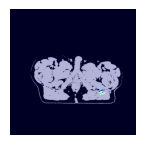

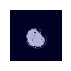

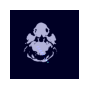

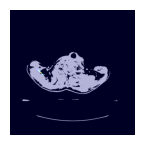

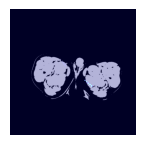

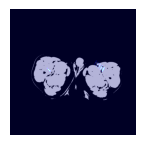

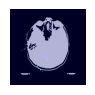

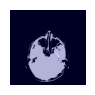

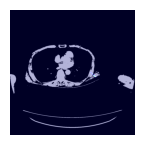

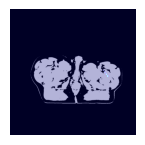

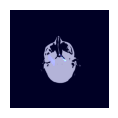

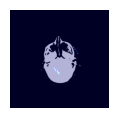

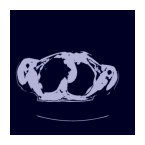

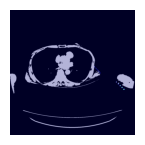

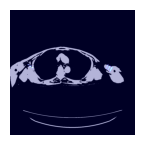

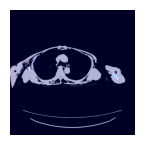

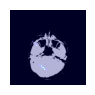

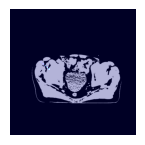

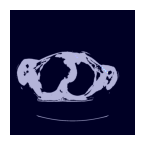

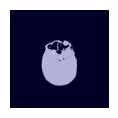

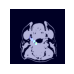

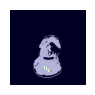

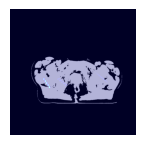

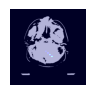

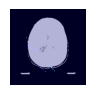

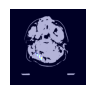

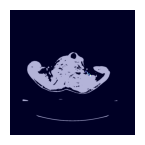

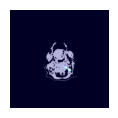

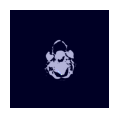

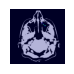

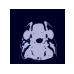

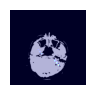

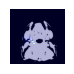

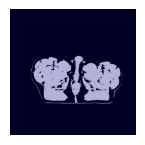

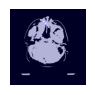

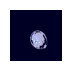

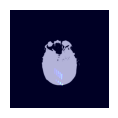

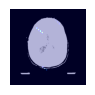

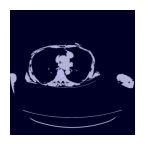

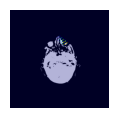

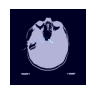

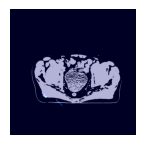

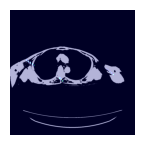

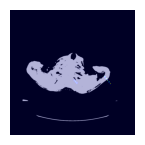

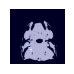

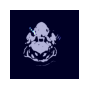

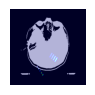

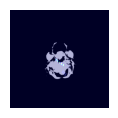

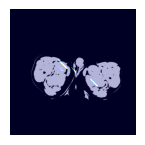

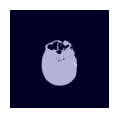

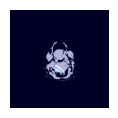

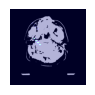

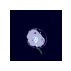

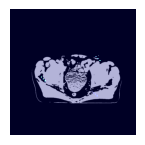

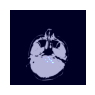

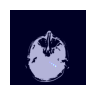

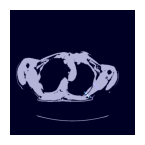

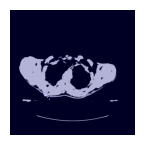

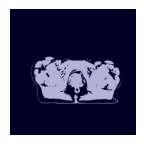

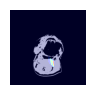

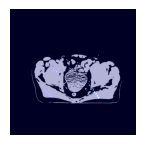

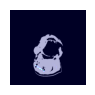

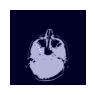

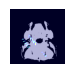

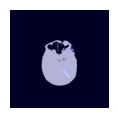

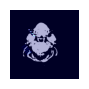

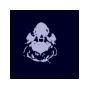

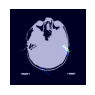

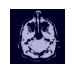

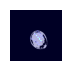

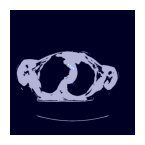

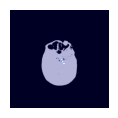

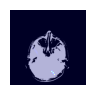

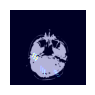

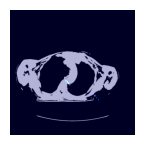

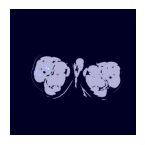

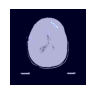

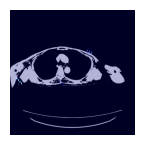

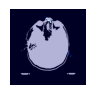

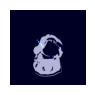

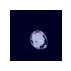

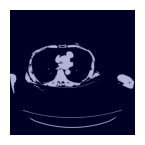

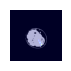

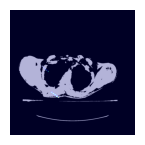

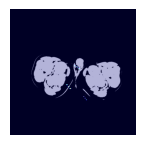

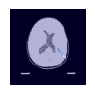

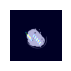

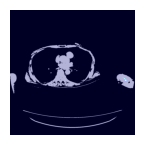

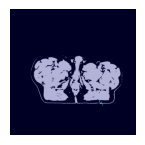

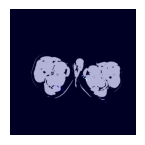

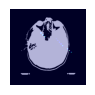

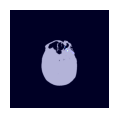

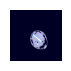

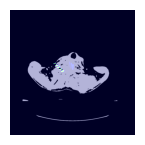

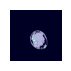

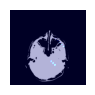

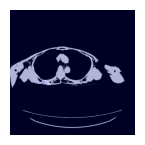

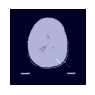

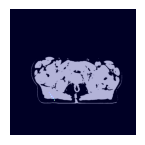

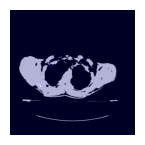

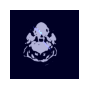

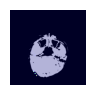

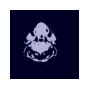

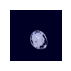

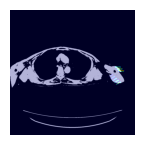

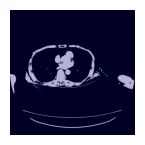

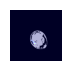

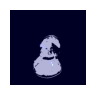

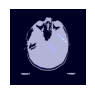

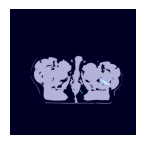

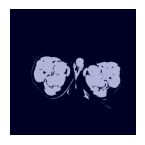

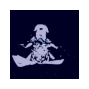

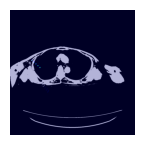

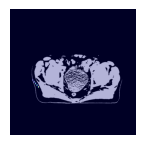

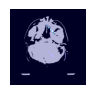

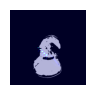

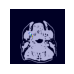

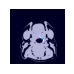

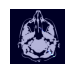

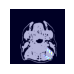

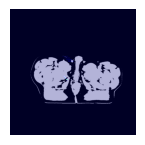

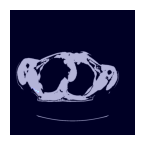

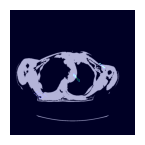

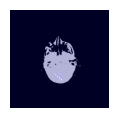

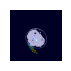

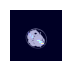

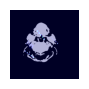

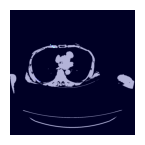

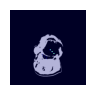

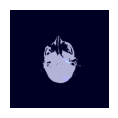

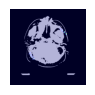

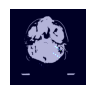

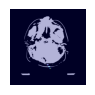

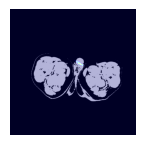

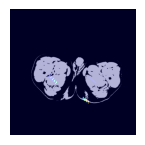

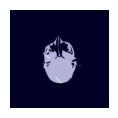

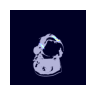

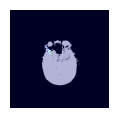

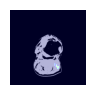

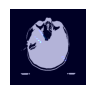

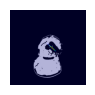

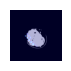

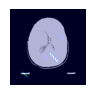

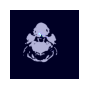

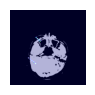

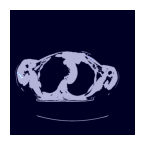

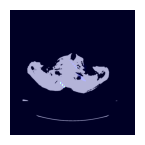

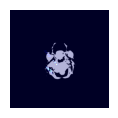

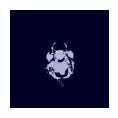

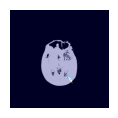

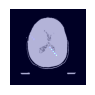

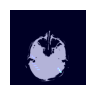

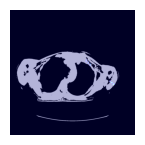

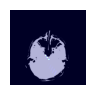

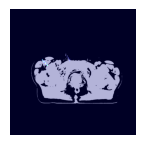

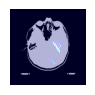

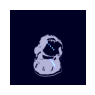

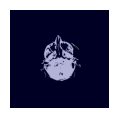

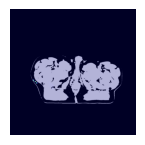

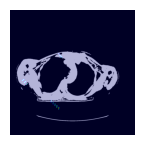

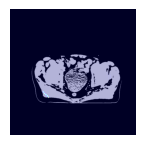

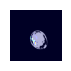

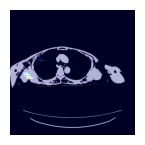

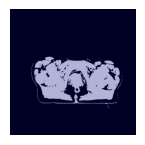

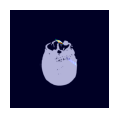

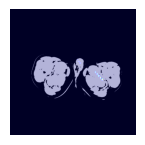

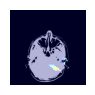

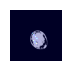

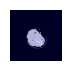

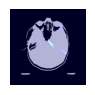

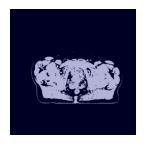

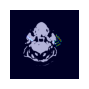

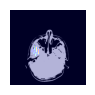

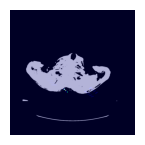

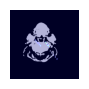

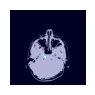

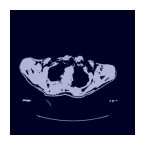

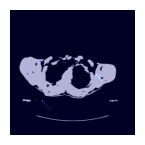

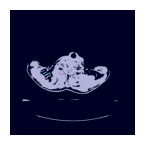

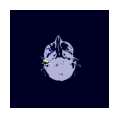

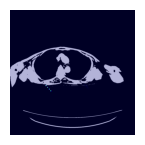

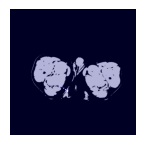

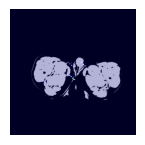

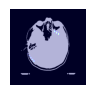

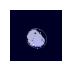

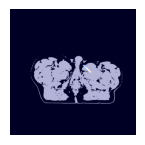

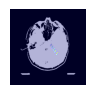

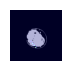

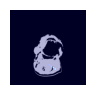

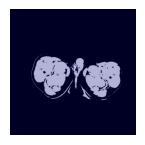

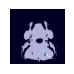

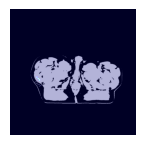

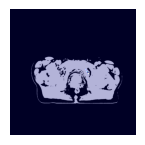

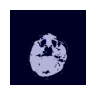

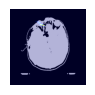

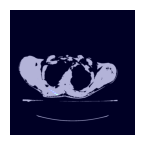

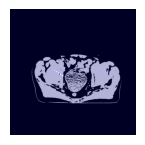

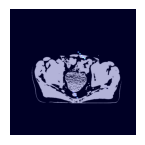

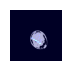

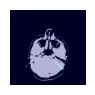

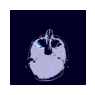

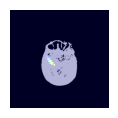

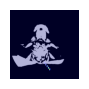

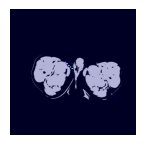

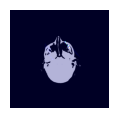

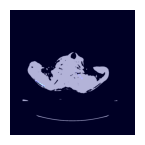

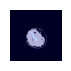

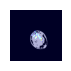

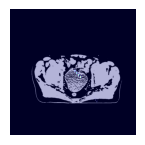

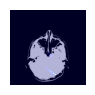

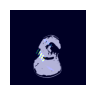

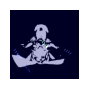

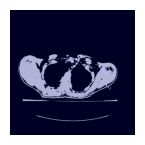

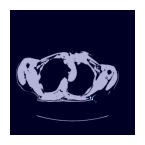

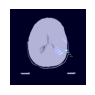

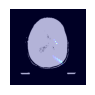

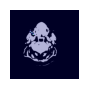

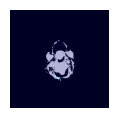

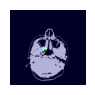

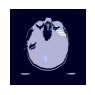

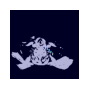

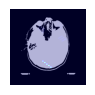

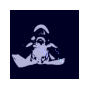

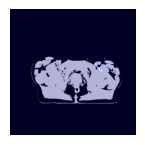

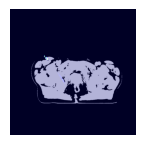

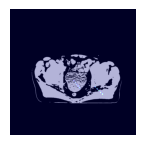

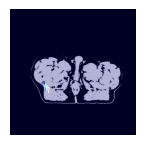

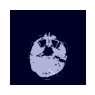

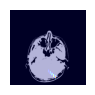

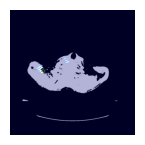

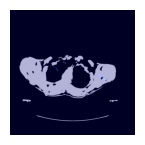

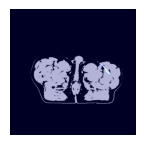

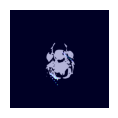

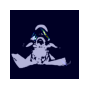

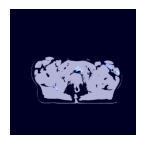

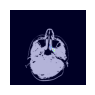

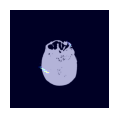

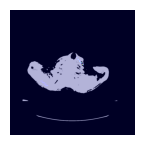

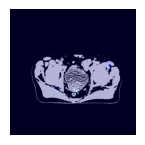

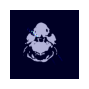

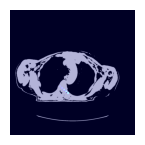

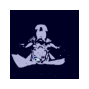

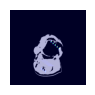

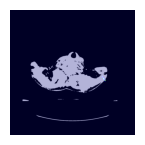

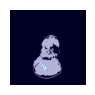

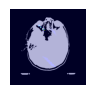

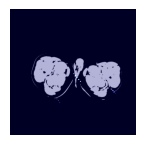

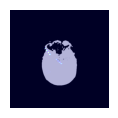

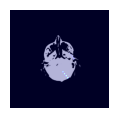

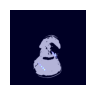

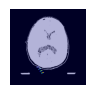

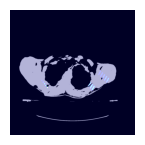

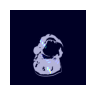

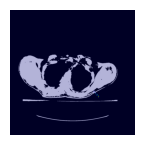

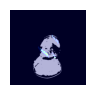

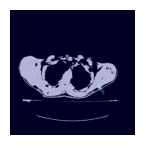

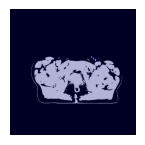

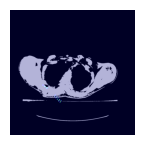

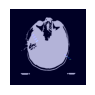

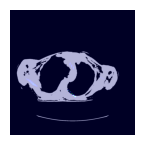

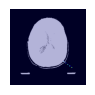

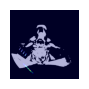

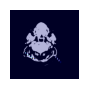

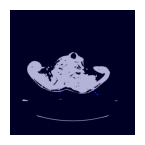

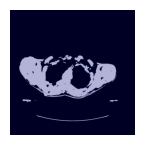

In [9]:
data=generate_bboxes(img_list,mask_list)

In [10]:
!zip -r "2D_images.zip" "2D_images"

  adding: 2D_images/ (stored 0%)
  adding: 2D_images/242.jpg (deflated 21%)
  adding: 2D_images/058.jpg (deflated 30%)
  adding: 2D_images/068.jpg (deflated 25%)
  adding: 2D_images/125.jpg (deflated 32%)
  adding: 2D_images/312.jpg (deflated 28%)
  adding: 2D_images/026.jpg (deflated 20%)
  adding: 2D_images/201.jpg (deflated 22%)
  adding: 2D_images/394.jpg (deflated 42%)
  adding: 2D_images/284.jpg (deflated 27%)
  adding: 2D_images/273.jpg (deflated 8%)
  adding: 2D_images/217.jpg (deflated 29%)
  adding: 2D_images/248.jpg (deflated 41%)
  adding: 2D_images/085.jpg (deflated 15%)
  adding: 2D_images/158.jpg (deflated 25%)
  adding: 2D_images/270.jpg (deflated 23%)
  adding: 2D_images/157.jpg (deflated 16%)
  adding: 2D_images/022.jpg (deflated 24%)
  adding: 2D_images/174.jpg (deflated 13%)
  adding: 2D_images/399.jpg (deflated 23%)
  adding: 2D_images/198.jpg (deflated 19%)
  adding: 2D_images/035.jpg (deflated 23%)
  adding: 2D_images/166.jpg (deflated 14%)
  adding: 2D_images/34

In [11]:
!rm -r 2D_images

In [12]:
data_df=pd.DataFrame(data)

In [13]:
data_df.head()

,file,h,w,x1,x2,y1,y2
0,216.jpg,690,690,255,279,294,305
1,216.jpg,690,690,270,294,309,320
2,216.jpg,690,690,285,309,324,335
3,216.jpg,690,690,300,324,339,350
4,216.jpg,690,690,315,339,354,365


In [14]:
data_df.to_csv("annotations.csv", index=None)